In [1]:
import sys
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

%matplotlib inline
print(f"Python version: {sys.version}\nNumpy version: {np.__version__}\nMatplotlib version: {matplotlib.__version__}\nPyTorch version: {torch.__version__}")

Python version: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:49:36) [Clang 16.0.6 ]
Numpy version: 1.26.4
Matplotlib version: 3.8.0
PyTorch version: 2.3.1


# Problem 1

## Setup (given)

In [2]:
N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N,p)
Y = 2*np.random.randint(2, size = N) - 1
lamda = 30

## Training

In [3]:
theta = 0.1 * np.random.randn(p)
phi = 0.1 * np.random.randn(p)
alpha = 3e-1
beta = 1e-4

epoch = 5000
L_val = []
d_phi_val = []
d_theta_val = []

for _ in range(epoch):
    for __ in range(N):
        # Use alternating stochastic gradient ascent-descent
        i = np.random.randint(N)  # stochastic so choose random index of gradient to descend/ascend
        stoc_d_phi = (Y[i] * theta) / (1 + np.exp(Y[i] * ((X[i,:]-phi) @ theta))) - lamda * phi
        phi += beta*stoc_d_phi
        
        # uses updated phi value
        stoc_d_theta = Y[i]*(phi-X[i,:]) / (1 + np.exp(Y[i] * ((X[i,:]-phi) @ theta)))
        theta -= alpha*stoc_d_theta

    L_i = np.average(np.log(1 + np.exp(-Y * ((X - phi.reshape(1,-1)) @ theta)))) - lamda/2 * np.linalg.norm(phi, axis=0, ord=2) **2
    d_phi = np.average(Y / (1 + np.exp(Y * ((X-phi.reshape(1,-1)) @ theta)))) * theta - lamda * phi
    d_theta = np.average(( -Y / (1 + np.exp(Y * ((X-phi.reshape(1,-1)) @ theta))) ).reshape(-1,1)*(X-phi.reshape(1,-1)), axis=0)

    L_val.append(L_i)
    d_phi_val.append(d_phi)
    d_theta_val.append(d_theta)

## Plot results

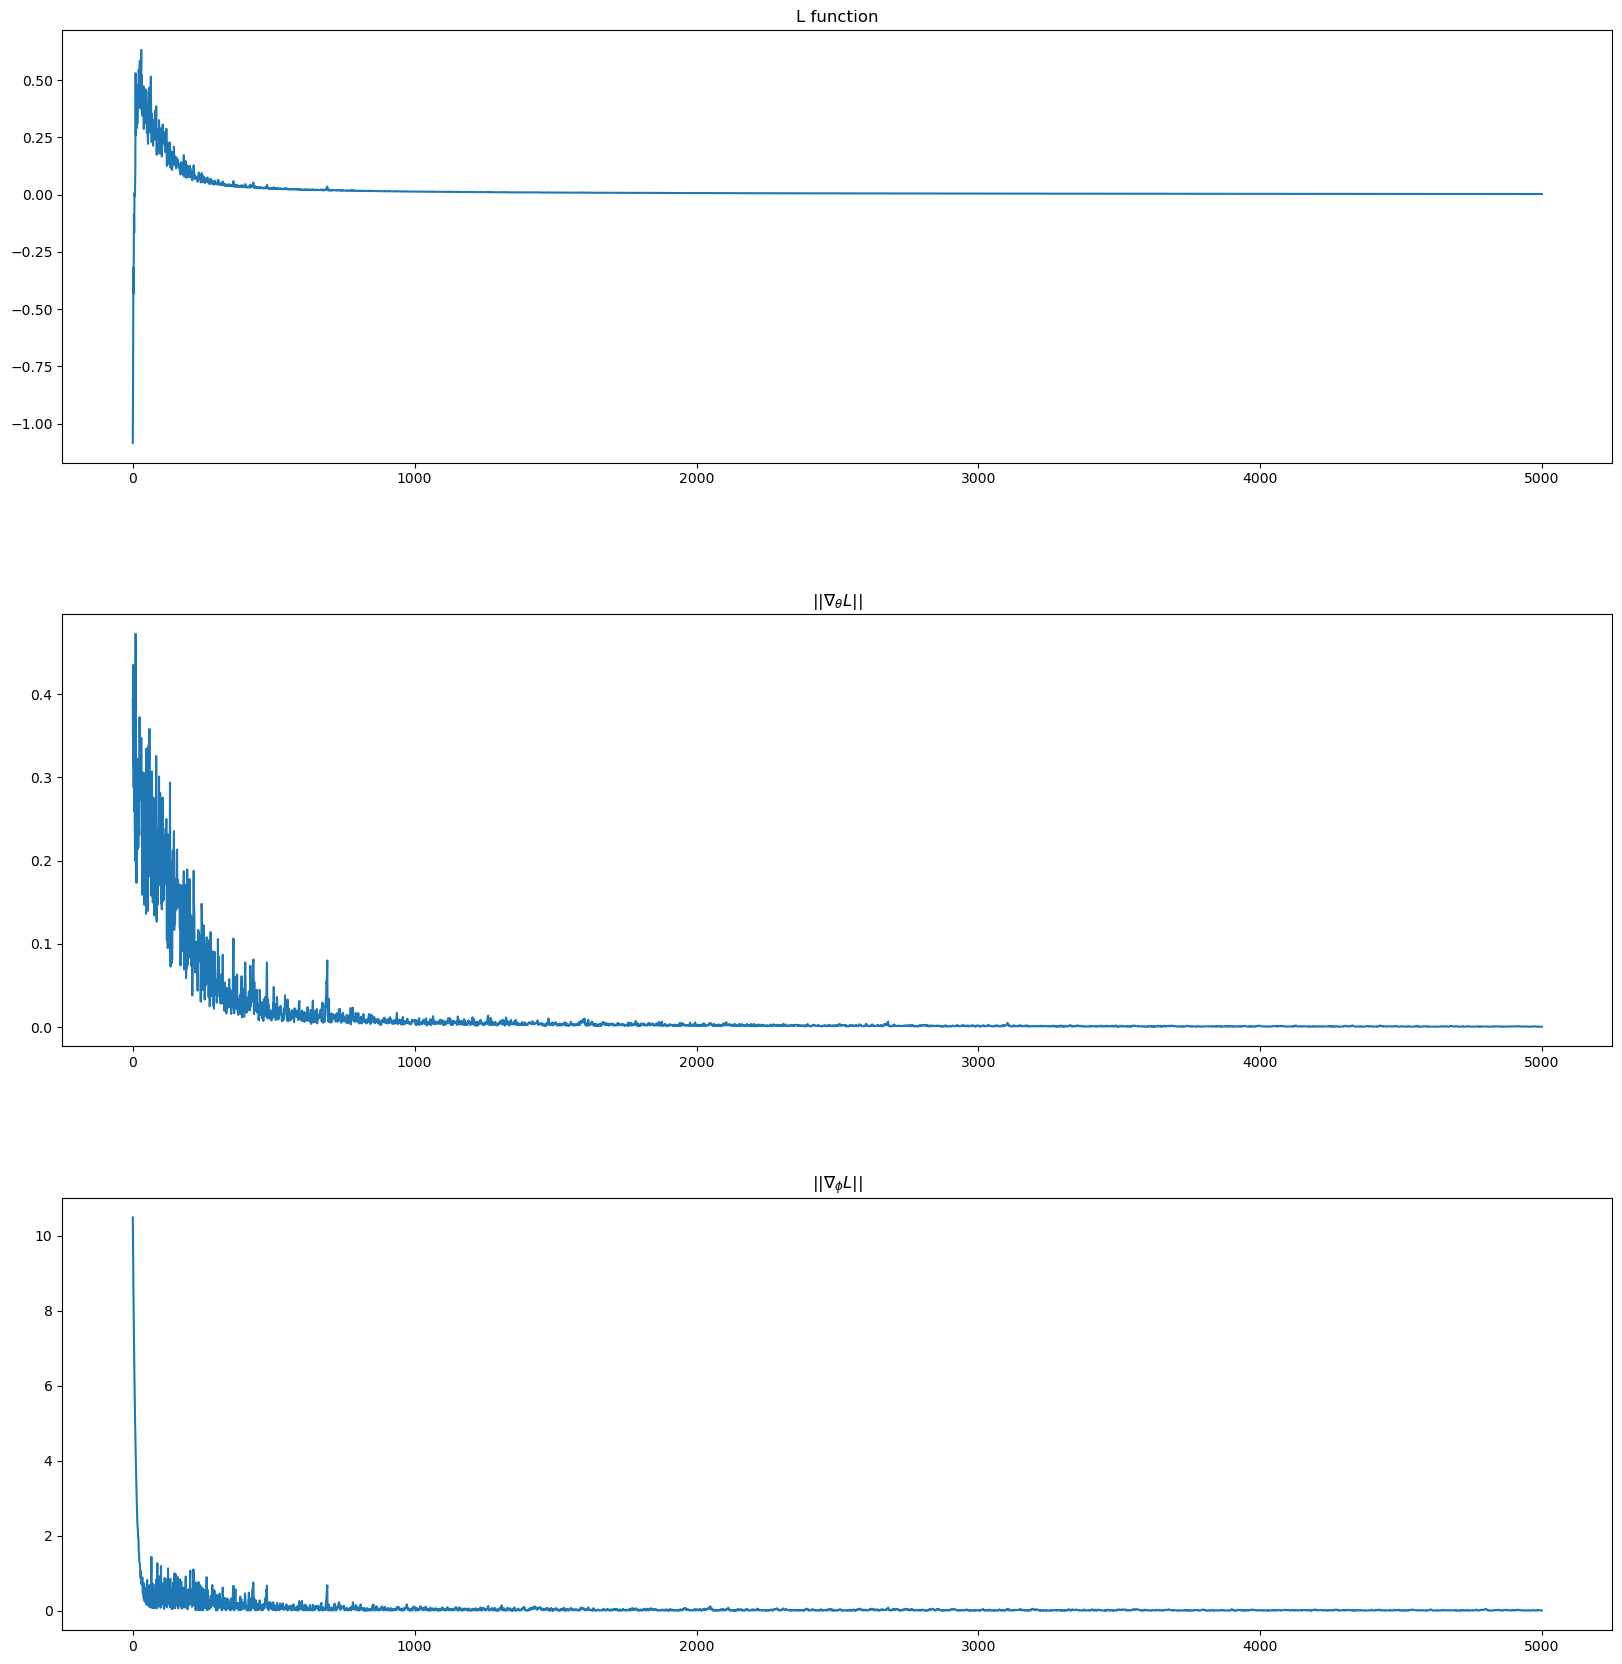

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)

ax1.set_title("L function")
ax1.plot(L_val)

ax2.set_title(r"$||\nabla_\theta L||$")
ax2.plot(np.linalg.norm(d_theta_val, axis=1, ord=2))

ax3.set_title(r"$||\nabla_\phi L||$")
ax3.plot(np.linalg.norm(d_phi_val, axis=1, ord=2))

plt.show()